In [ ]:
# Import necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten the images
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))


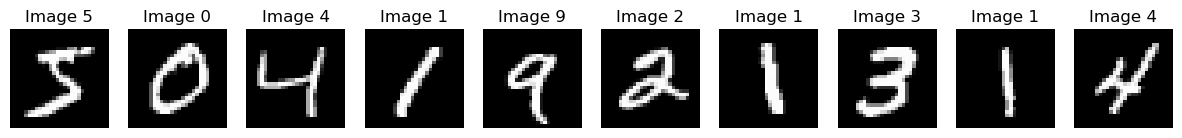

In [3]:
n = 10 
plt.figure(figsize=(15, 5))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap="gray")  
    plt.title(f"Image {y_train[i]}")
    plt.axis("off")
plt.show()


In [4]:
# Dimensions of input and encoded representation
input_dim = x_train.shape[1]  # 784
encoding_dim = 64  # Reduced dimensionality

# Build the Autoencoder model
input_img = Input(shape=(input_dim,))
# Encoder
encoded = Dense(encoding_dim, activation="relu")(input_img)
# Decoder
decoded = Dense(input_dim, activation="sigmoid")(encoded)

# Combine into Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model for reduced representation
encoder = Model(input_img, encoded)


In [5]:
# Compile the Autoencoder
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")


In [6]:
# Train the Autoencoder
autoencoder.fit(
    x_train, 
    x_train, 
    epochs=20, 
    batch_size=256, 
    shuffle=True, 
    validation_data=(x_test, x_test)
)


Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3468 - val_loss: 0.1627
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1532 - val_loss: 0.1283
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1245 - val_loss: 0.1102
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1080 - val_loss: 0.0978
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0966 - val_loss: 0.0902
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0898 - val_loss: 0.0849
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0849 - val_loss: 0.0815
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0818 - val_loss: 0.0792
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0796 - val_loss: 0.0777
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0780 - val_loss: 0.0765
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0769 - val_loss: 0.0757
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


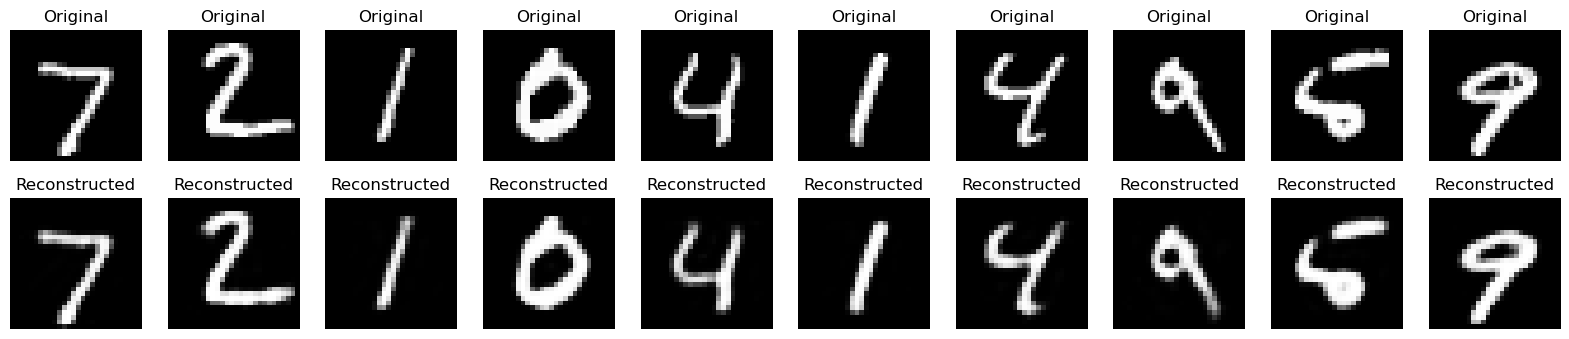

In [7]:
# Predict encoded and decoded images
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

# Visualize original and reconstructed images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


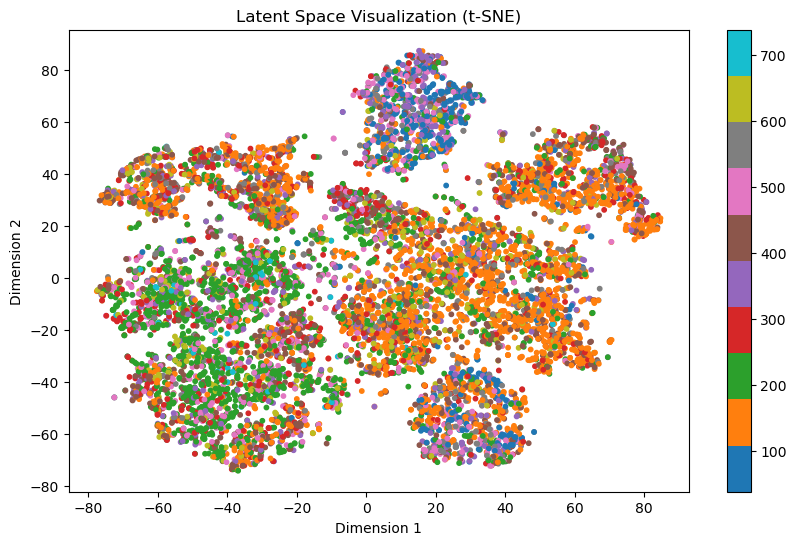

In [8]:
# Use t-SNE to visualize the latent space
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
latent_space_2d = tsne.fit_transform(encoded_imgs)

# Plot the latent space
plt.figure(figsize=(10, 6))
plt.scatter(latent_space_2d[:, 0], latent_space_2d[:, 1], c=np.argmax(x_test, axis=1), cmap="tab10", s=10)
plt.colorbar()
plt.title("Latent Space Visualization (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


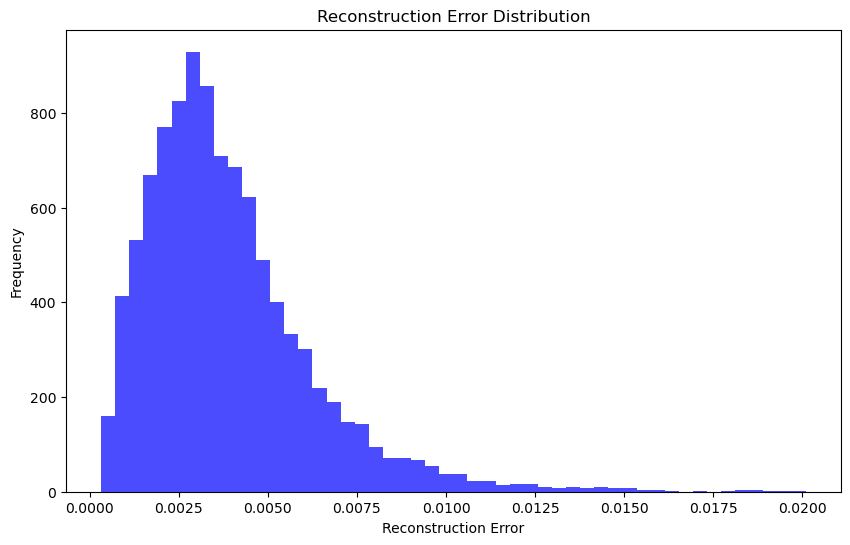

In [9]:
# Calculate reconstruction errors
reconstruction_errors = np.mean(np.square(x_test - decoded_imgs), axis=1)

# Plot reconstruction errors
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=50, color="blue", alpha=0.7)
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.show()


In [10]:
# Save the Autoencoder model
autoencoder.save("autoencoder_mnist.h5")
